In [68]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## The matplotlib and seaborn library for result visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

## **Loading the Dataset**
First we load the dataset and find out the number of columns, rows, NULL values, etc.

In [69]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [70]:
train.shape, test.shape

((891, 12), (418, 11))

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [77]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [78]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

## **Handling Missing Values**

Train Cabin and Fare

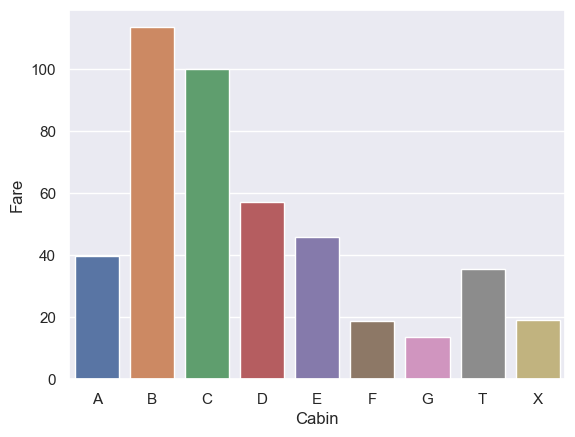

In [79]:
train['Cabin'].fillna(value='X', inplace=True)
train['Cabin'] = train['Cabin'].str[0]
df_tr = train[['Cabin', 'Fare']].groupby('Cabin').mean().reset_index()
a = sns.barplot(x=df_tr['Cabin'], y=df_tr['Fare'])

In [80]:
## Defining a function which reassigns the cabin according to the fare. After that, it is 
## applied to the dataframe to fill all the cabin column's missing value.
def reasign_cabin_tr(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin == 'X':
        df_tr_copy = df_tr.copy()
        df_tr_copy['Fare'] = abs(df_tr_copy['Fare']-pd.Series([fare]*len(df_tr_copy)))
        minimum = df_tr_copy['Fare'].min()
        return list(df_tr_copy[df_tr_copy['Fare'] == minimum].Cabin)[0]
    return cabin
    
train['Cabin'] = train[['Cabin', 'Fare']].apply(reasign_cabin_tr, axis=1)
train['Cabin'] = train.Cabin.astype("category").cat.codes

Train Cabin and Fare

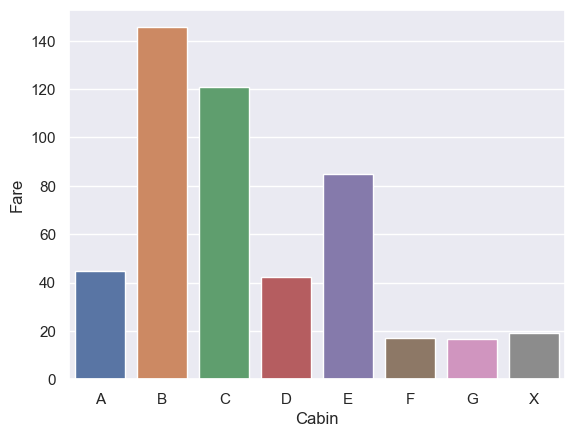

In [81]:
test['Fare'].fillna(value=test.Fare.mean(), inplace=True)
test['Cabin'].fillna(value='X', inplace=True)
test['Cabin'] = test['Cabin'].str[0]
df_te = test[['Cabin', 'Fare']].groupby('Cabin').mean().reset_index()
a = sns.barplot(x=df_te['Cabin'], y=df_te['Fare'])

In [82]:
def reasign_cabin_te(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin == 'X':
        df_te_copy = df_te.copy()
        df_te_copy['Fare'] = abs(df_te_copy['Fare']-pd.Series([fare]*len(df_te_copy)))
        minimum = df_te_copy['Fare'].min()
        return list(df_te_copy[df_te_copy['Fare'] == minimum].Cabin)[0]
    return cabin
    
test['Cabin'] = test[['Cabin', 'Fare']].apply(reasign_cabin_te, axis=1)
test['Cabin'] = test.Cabin.astype("category").cat.codes

Train Embarked

In [83]:
train['Embarked'] = train.Embarked.fillna(train.Embarked.dropna().max())

Train & Test Age from Pclass and Sex

In [84]:
# we will guess the age from Pclass and Sex:

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

**Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.**

In [85]:
combine = [train , test]

# Converting Sex categories (male and female) to 0 and 1:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

# Filling missed age feature:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,6,S


In [86]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [87]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# **Exploratory Data Analysis**

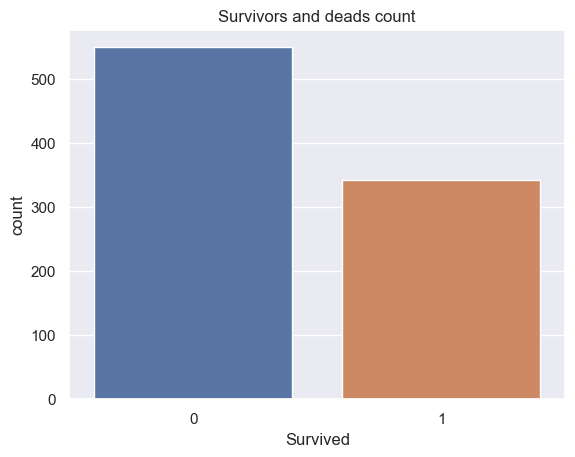

In [88]:
g = sns.countplot(x=train['Survived']).set_title('Survivors and deads count')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18524\365607870.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b = sns.barplot(x='Sex', y='Survived', data=train, ax=axarr[1], ci=None).set_ylabel('Survival rate')


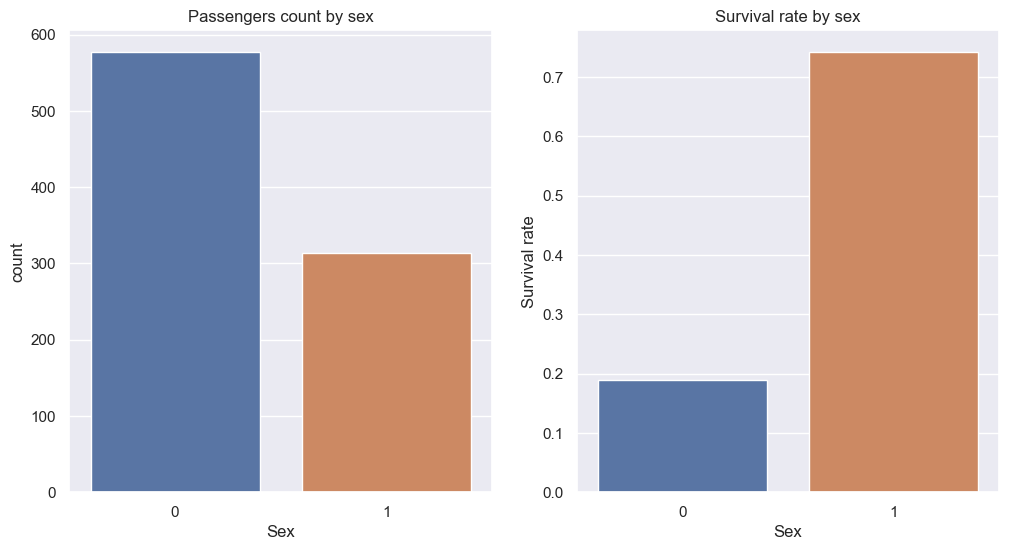

In [89]:
# Ladies first??
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(x=train['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train, ax=axarr[1], ci=None).set_ylabel('Survival rate')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18524\3925777754.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b = sns.barplot(x='Pclass', y='Survived', data=train, ax=axarr[1], ci=None).set_ylabel('Survival rate')


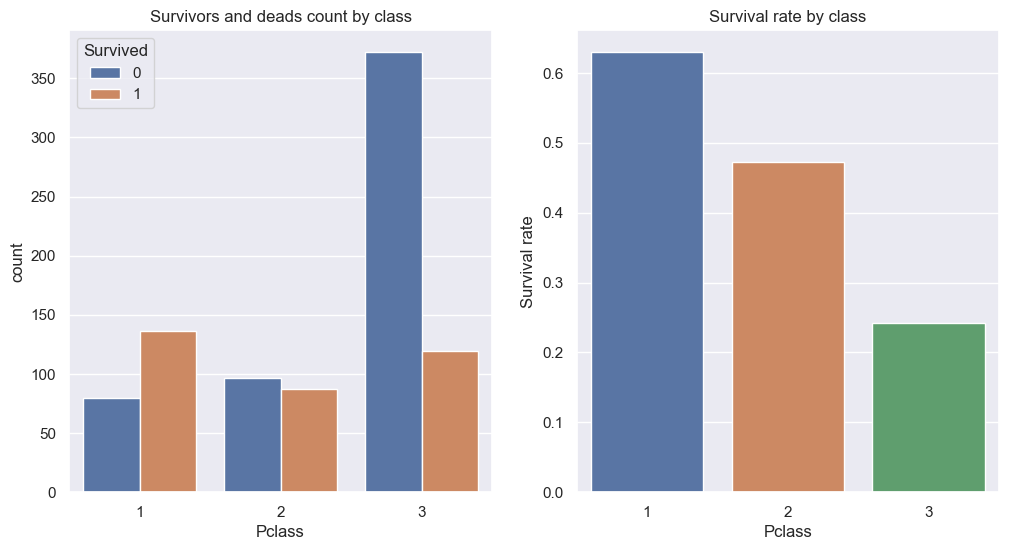

In [90]:
# Little dependent on pclass
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=train, ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=train, ax=axarr[1], ci=None).set_ylabel('Survival rate')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18524\3381985759.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, ci=None).set_ylabel('Survival rate')


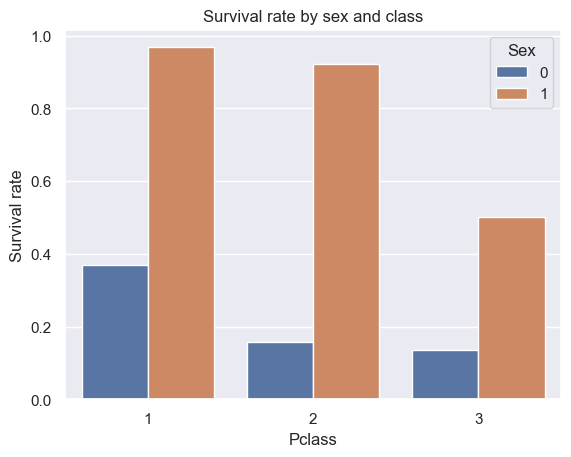

In [91]:
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, ci=None).set_ylabel('Survival rate')

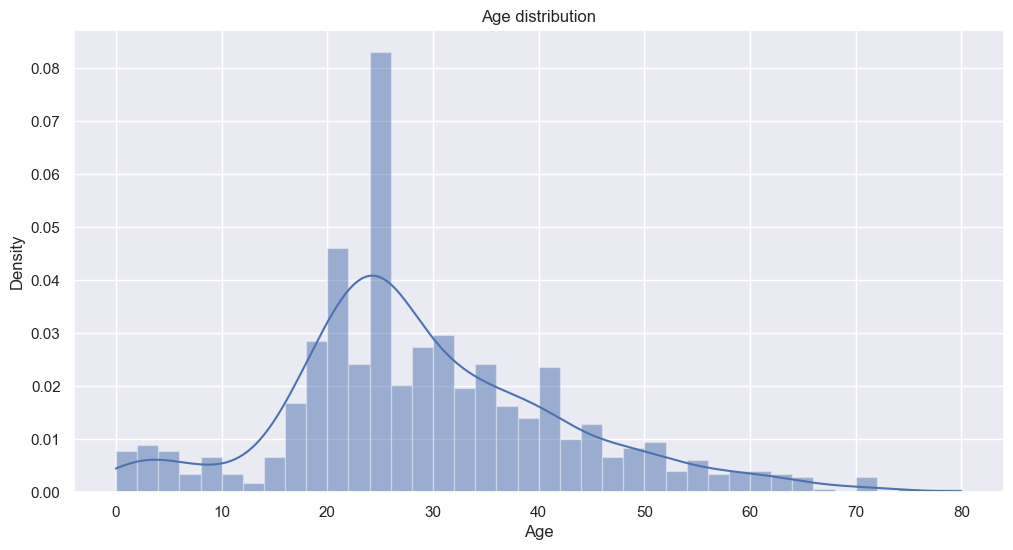

In [92]:
# Normal?
fig = plt.figure(figsize=(12,6))
sns.histplot(x=train['Age'], bins=40, kde=True, stat="density", edgecolor=(1,1,1,0.3)).set_title('Age distribution')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18524\49612789.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x=train['Cabin'], y=train.Survived, ci=None, ).set_ylabel('Survival rate')


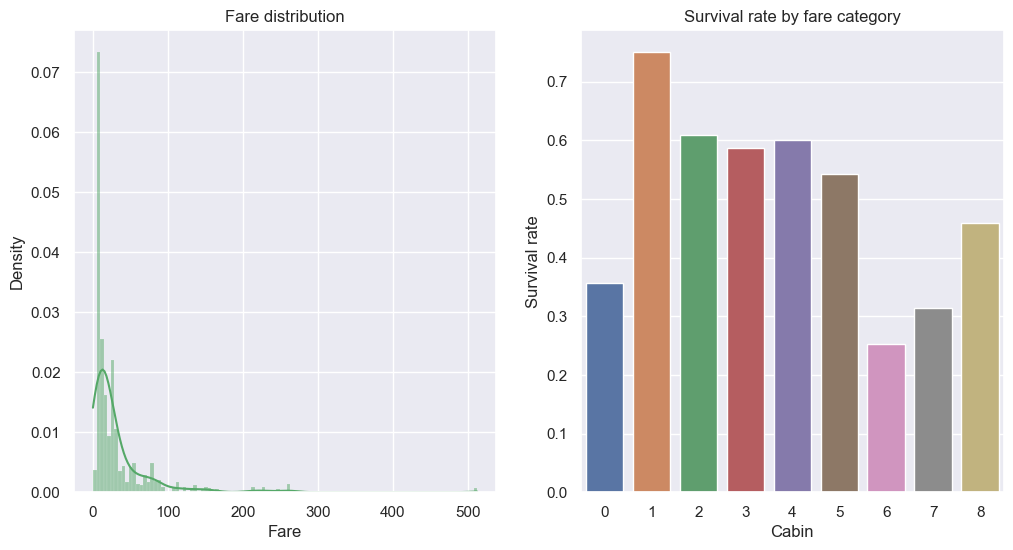

In [93]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
f = sns.histplot(x=train.Fare, color='g', ax=axarr[0], kde=True, stat="density", edgecolor=(1,1,1,0.3)).set_title('Fare distribution')
fare_ranges = pd.qcut(train.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=train['Cabin'], y=train.Survived, ci=None, ).set_ylabel('Survival rate')

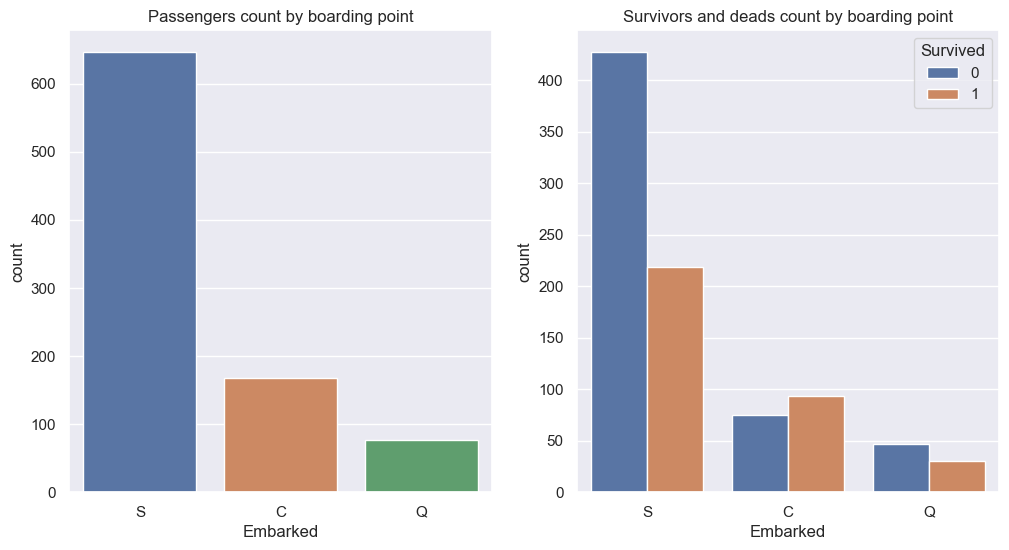

In [94]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=train['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train,
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18524\648761646.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b = sns.barplot(x='SibSp', y='Survived', data=train, ax=axarr[1], ci=None).set_ylabel('Survival rate')


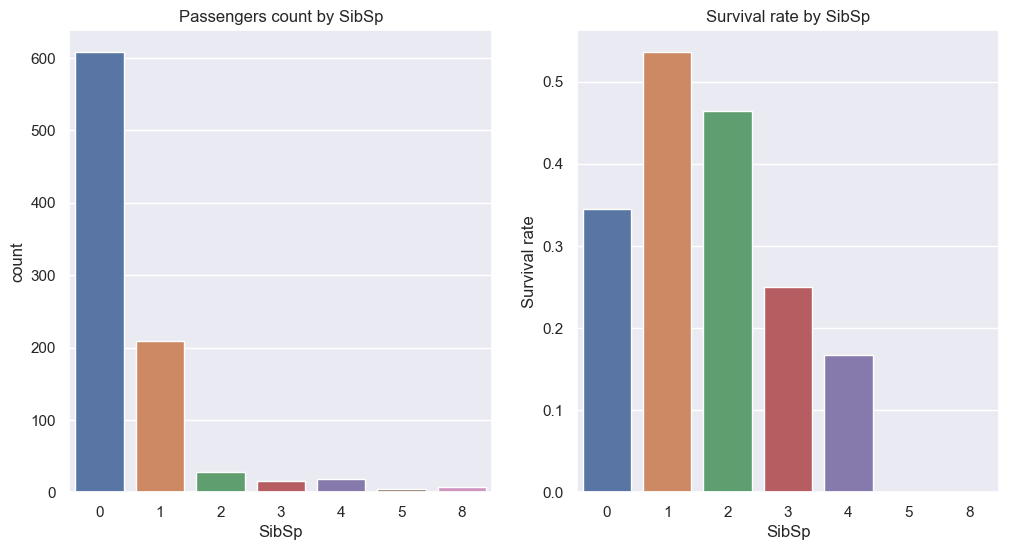

In [95]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x=train['SibSp'], ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train, ax=axarr[1], ci=None).set_ylabel('Survival rate')

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x=train['Parch'], ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train, ax=axarr[1], ci=None).set_ylabel('Survival rate')

In [ ]:
fig = plt.figure(figsize=(12,7))
sns.histplot(x=train['Age'], hue=train['Survived'])

In [ ]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=False, fmt='.2f')
plt.show()

In [ ]:
# Drop non-numeric columns
train = train.select_dtypes(include=['number'])

# Handle missing values (replace NaN with the mean of the column)
train = train.fillna(train.mean())

# Now, you can calculate the correlation matrix and create the heatmap
fig = plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, fmt='.2f')
plt.show()


# **Splitting the Dataset**
Training and Test Set

In [ ]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Parch','Age','SibSp', 'Embarked'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Parch','Age','SibSp', 'Embarked'], axis=1, inplace=True)

In [ ]:
train.shape, test.shape

Separating Label and Features

In [ ]:
X = train.iloc[:,1:]
y = train.iloc[:,0]

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
test = ss.transform(test)

# **Machine Learning model**

In [ ]:
def print_scores(model, X_train, Y_train, predictions, cv_splites=10):
    print("The mean accuracy score of the train data is %.5f" % model.score(X_train, Y_train))
    CV_scores = cross_val_score(model, X_train, Y_train, cv=cv_splites)
    print("The individual cross-validation scores are: \n",CV_scores)
    print("The minimum cross-validation score is %.3f" % min(CV_scores))
    print("The maximum cross-validation score is %.3f" % max(CV_scores))
    print("The  mean   cross-validation score is %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std() * 2))

In [ ]:
depth_range = range(1, 30, 1)
acc_vs_depth = {
    "depth": [],
    "train_acc": [],
    "valid_acc": []
}

for depth in depth_range:
    model = RandomForestClassifier(n_estimators=200, max_depth=depth, max_features=8, min_samples_split=2, random_state=7)
    model.fit(X_train, Y_train)
    X_train_pred = model.predict(X_train)
    X_val_pred = model.predict(X_val)
    acc_vs_depth["depth"].append(depth)
    acc_vs_depth["train_acc"].append((Y_train.to_numpy() == X_train_pred).mean())
    acc_vs_depth["valid_acc"].append((Y_val.to_numpy() == X_val_pred).mean())

In [ ]:
acc_vs_depth_df = pd.DataFrame(acc_vs_depth)
acc_vs_depth_df.sample(5)

Plotting results

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(acc_vs_depth_df.depth, acc_vs_depth_df.train_acc, label="Train Accuracy")
plt.plot(acc_vs_depth_df.depth, acc_vs_depth_df.valid_acc, label="Validation accuracy")
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=15, max_features=8, min_samples_split=2, random_state=7)
model.fit(X_train, Y_train)
predictions = model.predict(X_val)

In [ ]:
confusion_matrix(Y_val, predictions)

In [ ]:
print(classification_report(Y_val, predictions))

In [ ]:
print_scores(model, X_train, Y_train, predictions)

In [ ]:
model.predict(test)